In [1]:
import json
import glob
import re

import pandas as pd
import numpy as np

In [2]:
userrepos_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "created_at": [],
    "pushed_at": [],
    "updated_at": [],
    "fork": [],
    "language": [],
    "size": [],
    "description": [],
    "homepage": [],
    "license": [],
    "forks_count": [],
    "open_issues_count": [],
    "stargazers_count": [],
    "watchers_count": [],
}
for filename in glob.glob("/mnt/forks-of-cmssw/user-repos/*.json"):
    for repo in json.load(open(filename)):
        userrepos_lists["repo_id"].append(repo["id"])
        userrepos_lists["owner_login"].append(repo["owner"]["login"])
        userrepos_lists["owner_id"].append(repo["owner"]["id"])
        userrepos_lists["repo_name"].append(repo["name"])
        userrepos_lists["created_at"].append(pd.to_datetime(repo["created_at"]))
        userrepos_lists["pushed_at"].append(pd.to_datetime(repo["pushed_at"]))
        userrepos_lists["updated_at"].append(pd.to_datetime(repo["updated_at"]))
        userrepos_lists["fork"].append(repo["fork"])
        userrepos_lists["language"].append(repo["language"])
        userrepos_lists["size"].append(repo["size"])
        userrepos_lists["description"].append(repo["description"])
        userrepos_lists["homepage"].append(repo["homepage"])
        userrepos_lists["license"].append(None if repo["license"] is None else repo["license"]["name"])
        userrepos_lists["forks_count"].append(repo["forks_count"])
        userrepos_lists["open_issues_count"].append(repo["open_issues_count"])
        userrepos_lists["stargazers_count"].append(repo["stargazers_count"])
        userrepos_lists["watchers_count"].append(repo["watchers_count"])

In [3]:
userrepos = pd.DataFrame(userrepos_lists)
userrepos

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count
0,23456609,audrium,4990025,cmssw,2014-08-29 07:45:12+00:00,2015-05-06 09:11:37+00:00,2014-08-27 20:48:45+00:00,True,None,739072,CMS Offline Software,cms-sw.github.io/cmssw,None,0,0,0,0
1,26166435,audrium,4990025,CondDB-WS,2014-11-04 11:41:58+00:00,2015-02-05 14:01:47+00:00,2015-02-05 14:01:49+00:00,False,Python,3320,RESTful web service for Hcal condition database,None,None,0,0,0,0
2,110131661,audrium,4990025,cvss3,2017-11-09 15:23:12+00:00,2017-12-19 12:05:17+00:00,2018-10-20 06:22:44+00:00,False,JavaScript,1471,Common Vulnerability Scoring System Version 3....,https://audrium.github.io/cvss3,None,0,0,2,2
3,171297810,audrium,4990025,game-of-life,2019-02-18 14:22:06+00:00,2019-02-18 16:04:50+00:00,2019-02-22 18:13:08+00:00,False,JavaScript,13004,Cellular automaton invented by John Conway,None,None,0,0,4,4
4,12296715,audrium,4990025,JSqlParser,2013-08-22 12:46:35+00:00,2013-08-22 13:48:00+00:00,2013-08-22 20:24:56+00:00,True,Java,1694,JSqlParser parses an SQL statement and transla...,https://github.com/JSQLParser/JSqlParser/wiki,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120301,253739954,5l1v3r1,34143537,Cheaterpress,2020-04-07 08:58:14+00:00,2012-12-26 23:15:52+00:00,2020-04-07 08:58:17+00:00,True,None,2536,A Letterpress cheater app,None,None,0,0,0,0
120302,161165276,ebossiniCern,38529812,cmssw,2018-12-10 11:36:13+00:00,2020-07-01 13:31:01+00:00,2018-12-10 11:38:33+00:00,True,C++,1211184,CMS Offline Software,http://cms-sw.github.io/,None,0,0,0,0
120303,23463917,akalamar,7590983,cmssw,2014-08-29 12:54:15+00:00,2014-08-29 12:25:26+00:00,2014-08-27 20:48:45+00:00,True,None,540746,CMS Offline Software,cms-sw.github.io/cmssw,None,0,0,0,0
120304,23389967,akalamar,7590983,SUSY-JGB,2014-08-27 13:07:45+00:00,2014-08-27 13:07:47+00:00,2014-08-27 13:07:45+00:00,False,None,0,"Jet Gamma Balance method, coding",None,MIT License,0,0,0,0


In [4]:
users_with_cmssw = userrepos[(userrepos["repo_name"] == "cmssw") & (userrepos["fork"])]["owner_login"]

In [5]:
userrepos_cut = userrepos[userrepos["owner_login"].isin(users_with_cmssw)]
userrepos_cut = userrepos_cut[~userrepos_cut["fork"]]

<AxesSubplot:ylabel='Frequency'>

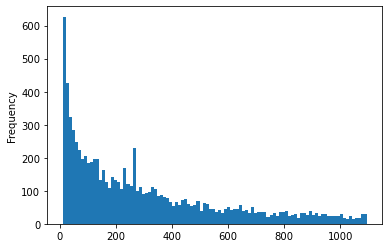

In [6]:
(
    (userrepos_cut["updated_at"] - userrepos_cut["created_at"]).dt.total_seconds() / (24*60*60)
).plot.hist(bins=100, range=(10, 3*365))

In [7]:
words = userrepos_cut.description.str.lower().str.replace(re.compile(r"[^a-z0-9\s_\.-]"), "").str.split(r"[\s_\.-]+")

In [8]:
personal = [
    "my",
    "personal",
]

educational = [
    "thesis",
    "phd",
    "masters",
    "dissertation",
    "presentation",
    "presentations",
    "proceedings",
    "tutorial",
    "tutorials",
    "university",
    "universities",
    "classroom",
    "workshop",
]

analysis = [
    "analyze",
    "analysis",
    "analyses",
    "analyzer",
    "analyzing",
    "study",
    "studies",
    "script",
    "scripts",
    "plot",
    "plots",
    "plotting",
    "plotter",
    "plotters",
    "histogram",
    "histograms",
    "macros",
    "tool",
    "tools",
    "framework",
    "frameworks",
    "toolkit",
    "toolkits",
]

machine_learning = [
    "ml",
    "machine",
    "learn",
    "learning",
    "neural",
    "training",
    "regression",
    "regressions",
    "bdt",
    "mva",
]

computer_words = [
    "python",
    "c",
    "javascript",
    "latex",
    "php",
    "jupyter",
    "spark",
    "aws",
    "keras",
    "tensorflow",
    "gpu",
    "matlab",
    "torch",
    "pytorch",
    "julia",
    "vim",
    "boost",
    "clang",
    "ipython",
    "openstack",
    "bash",
    "matplotlib",
    "docker",
    "dockerfile",
    "sql",
    "json",
    "xml",
    "rust",
    "scala",
    "cmake",
    "ruby",
    "kubernetes",
    "webgl",
    "beamer",
]

physics_brands = [
    "cms",
    "cmssw",
    "root",
    "xrootd",
    "cern",
    "geant",
    "geant4",
    "atlas",
    "tmva",
    "htcondor",
    "grid",
    "delphes",
    "pythia",
    "pythia6",
    "pythia8",
    "houches",
    "edm",
    "svfit",
    "fastjet",
    "roofit",
    "crab3",
    "lxplus",
]

physics_likely = [
    "trigger",
    "triggers",
    "detector",
    "detectors",
    "reconstruction",
    "simulate",
    "simulates",
    "simulating",
    "simulator",
    "simulators",
    "simulation",
    "simulations",
    "validation",
    "validations",
    "calibration",
    "calibrations",
    "alignment",
    "alignments",
    "energy",
    "energies",
    "particle",
    "particles",
    "event",
    "events",
    "beam",
    "mass",
    "tagging",
    "tagger",
    "taggers",
    "tracking",
    "fit",
    "fits",
    "fitter",
    "fitters",
    "signal",
    "signals",
    "background",
    "backgrounds",
    "cluster",
    "clusters",
    "gem",
    "run2",
    "quantum",
    "cosmic",
    "charge",
    "charged",
    "clustering",
    "tuple",
    "tuples",
    "luminosity",
    "collision",
    "collisions",
    "colliding",
    "momentum",
    "momenta",
    "top",
    "tops",
]

physics_definite = [
    "ntuple",
    "ntuples",
    "ntuplizer",
    "ntuplizers",
    "kinematic",
    "qcd",
    "mc",
    "monte",
    "carlo",
    "carlos",
    "tev",
    "susy",
    "daq",
    "dqm",
    "hcal",
    "hgcal",
    "ecal",
    "tracker",
    "rpc",
    "hlt",
    "lhe",
    "jet",
    "jets",
    "quark",
    "quarks",
    "higgs",
    "tau",
    "taus",
    "muon",
    "muons",
    "photon",
    "photons",
    "electron",
    "electrons",
    "proton",
    "protons",
    "lepton",
    "leptons",
    "leptonic",
    "hadron",
    "hadrons",
    "hadronic",
    "meson",
    "mesons",
    "mu",
    "gamma",
    "decay",
    "decays",
    "boson",
    "fermion",
    "ttbar",
    "boosted",
]

In [9]:
userrepos_cut["personal"] = words.apply(lambda d: False if d is None else any(word in personal for word in d))
userrepos_cut["educational"] = words.apply(lambda d: False if d is None else any(word in educational for word in d))
userrepos_cut["analysis"] = words.apply(lambda d: False if d is None else any(word in analysis for word in d))
userrepos_cut["machine_learning"] = words.apply(lambda d: False if d is None else any(word in machine_learning for word in d))
userrepos_cut["computer_words"] = words.apply(lambda d: False if d is None else any(word in computer_words for word in d))
userrepos_cut["physics_brands"] = words.apply(lambda d: False if d is None else any(word in physics_brands for word in d))
userrepos_cut["physics_likely"] = words.apply(lambda d: False if d is None else any(word in physics_likely for word in d))
userrepos_cut["physics_definite"] = words.apply(lambda d: False if d is None else any(word in physics_definite for word in d))

In [10]:
userrepos_cut["Python"] = userrepos_cut["language"] == "Python"
userrepos_cut["Jupyter"] = userrepos_cut["language"] == "Jupyter Notebook"
userrepos_cut["C and C++"] = (userrepos_cut["language"] == "C") | (userrepos_cut["language"] == "C++")
userrepos_cut["long_lived"] = (userrepos_cut["updated_at"] - userrepos_cut["created_at"]).dt.total_seconds() > (7*24*60*60)

In [11]:
all_words = words.explode()

Text(0.5, 0, 'Number of repositories with a given word in its description')

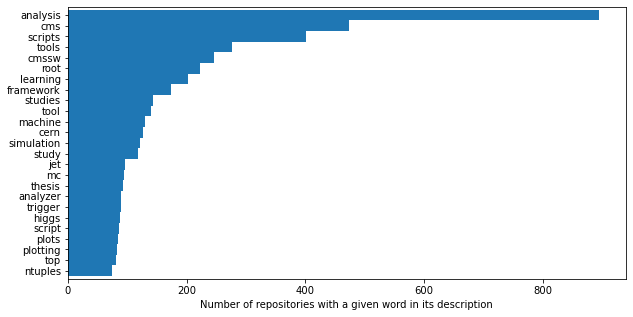

In [12]:
ax = all_words[
    all_words.isin(educational) | all_words.isin(analysis) | all_words.isin(machine_learning) |
    all_words.isin(physics_brands) | all_words.isin(physics_likely) | all_words.isin(physics_definite)
].value_counts(ascending=True).iloc[-25:].plot.barh(width=1.0, figsize=(10, 5))
ax.set_xlabel("Number of repositories with a given word in its description")

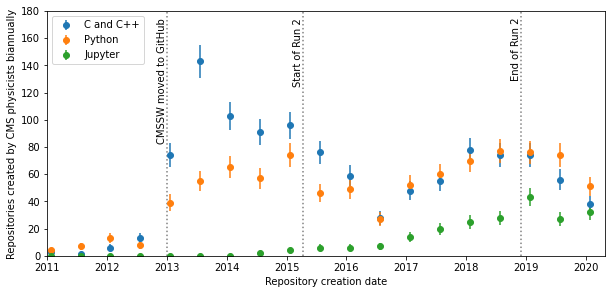

In [13]:
physicists = userrepos_cut[(
    userrepos_cut["educational"] | userrepos_cut["analysis"] |  userrepos_cut["machine_learning"] |
    userrepos_cut["physics_brands"] | userrepos_cut["physics_likely"] | userrepos_cut["physics_definite"]
) & userrepos_cut["long_lived"]]
physicists.index = physicists["created_at"]
bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("183 D", origin=userrepos_cut["created_at"].max()).sum()
ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 5))
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 175, "CMSSW moved to GitHub", rotation=90, va="top")
ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Repositories created by CMS physicists biannually")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-05-01"))
ax.set_ylim(0, 180)
ax.legend(loc="upper left");

In [14]:
userrepos[["updated_at", "created_at"]]

,updated_at,created_at
0,2014-08-27 20:48:45+00:00,2014-08-29 07:45:12+00:00
1,2015-02-05 14:01:49+00:00,2014-11-04 11:41:58+00:00
2,2018-10-20 06:22:44+00:00,2017-11-09 15:23:12+00:00
3,2019-02-22 18:13:08+00:00,2019-02-18 14:22:06+00:00
4,2013-08-22 20:24:56+00:00,2013-08-22 12:46:35+00:00
...,...,...
120301,2020-04-07 08:58:17+00:00,2020-04-07 08:58:14+00:00
120302,2018-12-10 11:38:33+00:00,2018-12-10 11:36:13+00:00
120303,2014-08-27 20:48:45+00:00,2014-08-29 12:54:15+00:00
120304,2014-08-27 13:07:45+00:00,2014-08-27 13:07:45+00:00


In [15]:
userrepos_cut2 = userrepos[
    userrepos["owner_login"].isin(users_with_cmssw) &
    ~userrepos["fork"]
].copy()
userrepos_cut2["C and C++"] = (userrepos_cut2["language"] == "C") | (userrepos_cut2["language"] == "C++")
userrepos_cut2["Python"] = userrepos_cut2["language"] == "Python"
userrepos_cut2["Jupyter"] = userrepos_cut2["language"] == "Jupyter Notebook"
userrepos_cut2 = userrepos_cut2.groupby([
    pd.Grouper(key="owner_login"),
    pd.Grouper(key="created_at", freq="183 D", origin=userrepos_cut["created_at"].max()),
])[["C and C++", "Python", "Jupyter"]].sum()
sum1 = userrepos_cut2.groupby(level=1).count()
sumx = userrepos_cut2.groupby(level=1).sum()
sumxx = (userrepos_cut2**2).groupby(level=1).sum()
y = (sumx / sum1)
yerr = np.sqrt((sumxx / sum1) - (sumx / sum1)**2) / np.sqrt(sum1)

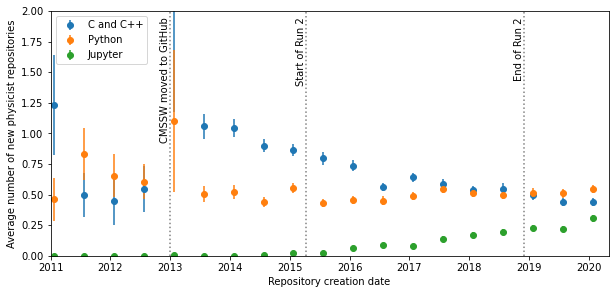

In [16]:
ax = y.plot(yerr=yerr, marker="o", ls="none", rot=0, figsize=(10, 5))
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 1.95, "CMSSW moved to GitHub", rotation=90, va="top")
ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 1.95, "Start of Run 2", rotation=90, va="top")
ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 1.95, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Average number of new physicist repositories")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-05-01"))
ax.set_ylim(0, 2)
ax.legend(loc="upper left");

In [39]:
search_uproot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/uproot/*.json"):
    for match in json.load(open(filename))["items"]:
        search_uproot_lists["repo_id"].append(match["repository"]["id"])
        search_uproot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_uproot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_uproot_lists["repo_name"].append(match["repository"]["name"])
        search_uproot_lists["path"].append(match["path"])
        search_uproot_lists["fork"].append(match["repository"]["fork"])

search_uproot = pd.DataFrame(search_uproot_lists)
search_uproot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)
search_uproot

repo_id   owner_login  owner_id  \
owner_login  repo_name                                             
dteague      MVA_studies       219962224       dteague  12455479   
             VVPlotter         217491305       dteague  12455479   
             VVPlotter         217491305       dteague  12455479   
             MVA_studies       219962224       dteague  12455479   
             VVPlotter         217491305       dteague  12455479   
...                                  ...           ...       ...   
taroni       ZmmAnalyser       197587574        taroni   3215254   
gouskos      HATS2020_HRT      275866634       gouskos   8414509   
bencammett   ML_project_Comp2  181893570    bencammett  25538254   
             ML_project_Comp2  181893570    bencammett  25538254   
Joe-W-Davies Harry_Plotter     260979087  Joe-W-Davies  47109807   

                                      repo_name  \
owner_login  repo_name                            
dteague      MVA_studies            MVA_studies   
             VVPlotter                VVPlotter   
             VVPlotter                VVPlotter   
             MVA_studies            MVA_studies   
             VVPlotter                VVPlotter   
...                                         ...   
taroni       ZmmAnalyser            ZmmAnalyser   
gouskos      HATS2020_HRT          HATS2020_HRT   
bencammett   ML_project_Comp2  ML_project_Comp2   
             ML_project_Comp2  ML_project_Comp2   
Joe-W-Davies Harry_Plotter        Harry_Plotter   

                                                                path   fork  
owner_login  repo_name                                                       
dteague      MVA_studies                              merge_trees.py  False  
             VVPlotter                              setup_combine.py  False  
             VVPlotter                     Utilities/UprootWriter.py  False  
             MVA_studies                       Utilities/MvaMaker.py  False  
             VVPlotter                        histograms/__init__.py  False  
...                                                              ...    ...  
taroni       ZmmAnalyser       ZmmAnalyser/test/readingNeighbours.py  False  
gouskos      HATS2020_HRT                           taggerComp.ipynb  False  
bencammett   ML_project_Comp2                  read_part_class.ipynb  False  
             ML_project_Comp2            read_part_class_clean.ipynb  False  
Joe-W-Davies Harry_Plotter                           HarryPlotter.py  False  

[1196 rows x 6 columns]

In [54]:
search_uproot_vstime = pd.merge(search_uproot, userrepos.set_index(["owner_login", "repo_name"]))
search_uproot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_uproot_vstime = search_uproot_vstime.groupby(level=2).max()["repo_id"] != 0
search_uproot_vstime = search_uproot_vstime.resample("183 D", origin=userrepos_cut["created_at"].max()).sum()

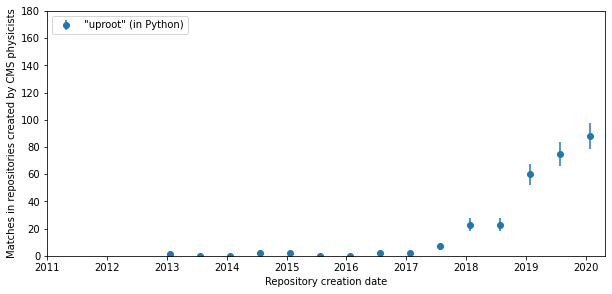

In [61]:
ax = search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, figsize=(10, 5))
# ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
# ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 175, "CMSSW moved to GitHub", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Matches in repositories created by CMS physicists")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-05-01"))
ax.set_ylim(0, 180)
ax.legend(["\"uproot\" (in Python)"], loc="upper left");